## Project 3
 ### Team:3
    
    Matt Keeley
    Jenny Yang
    Shay Masood
    Shreyansh Saraiya
    Fatma Butun



# OVERVIEW

### Here we aim to predict whether a breast tumor is benign or malignant based on certain cell features by using Machine Learning algorithm.
### The result will be published on heroku

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
import joblib
import seaborn as sns

# Read csv and do data cleaning

In [2]:
breast_cancer_df = pd. read_csv("breast_cancer_data.csv")

In [3]:
# breast_cancer_df.tail()

In [4]:
breast_cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# Drop the null columns where all values are null
breast_cancer_df = breast_cancer_df.dropna(axis='columns', how='all')
# Drop the null rows
breast_cancer_df = breast_cancer_df.dropna()
breast_cancer_df.shape

(569, 32)

In [6]:
df_mean = breast_cancer_df[breast_cancer_df.columns[1:11]]
df_mean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809
...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397


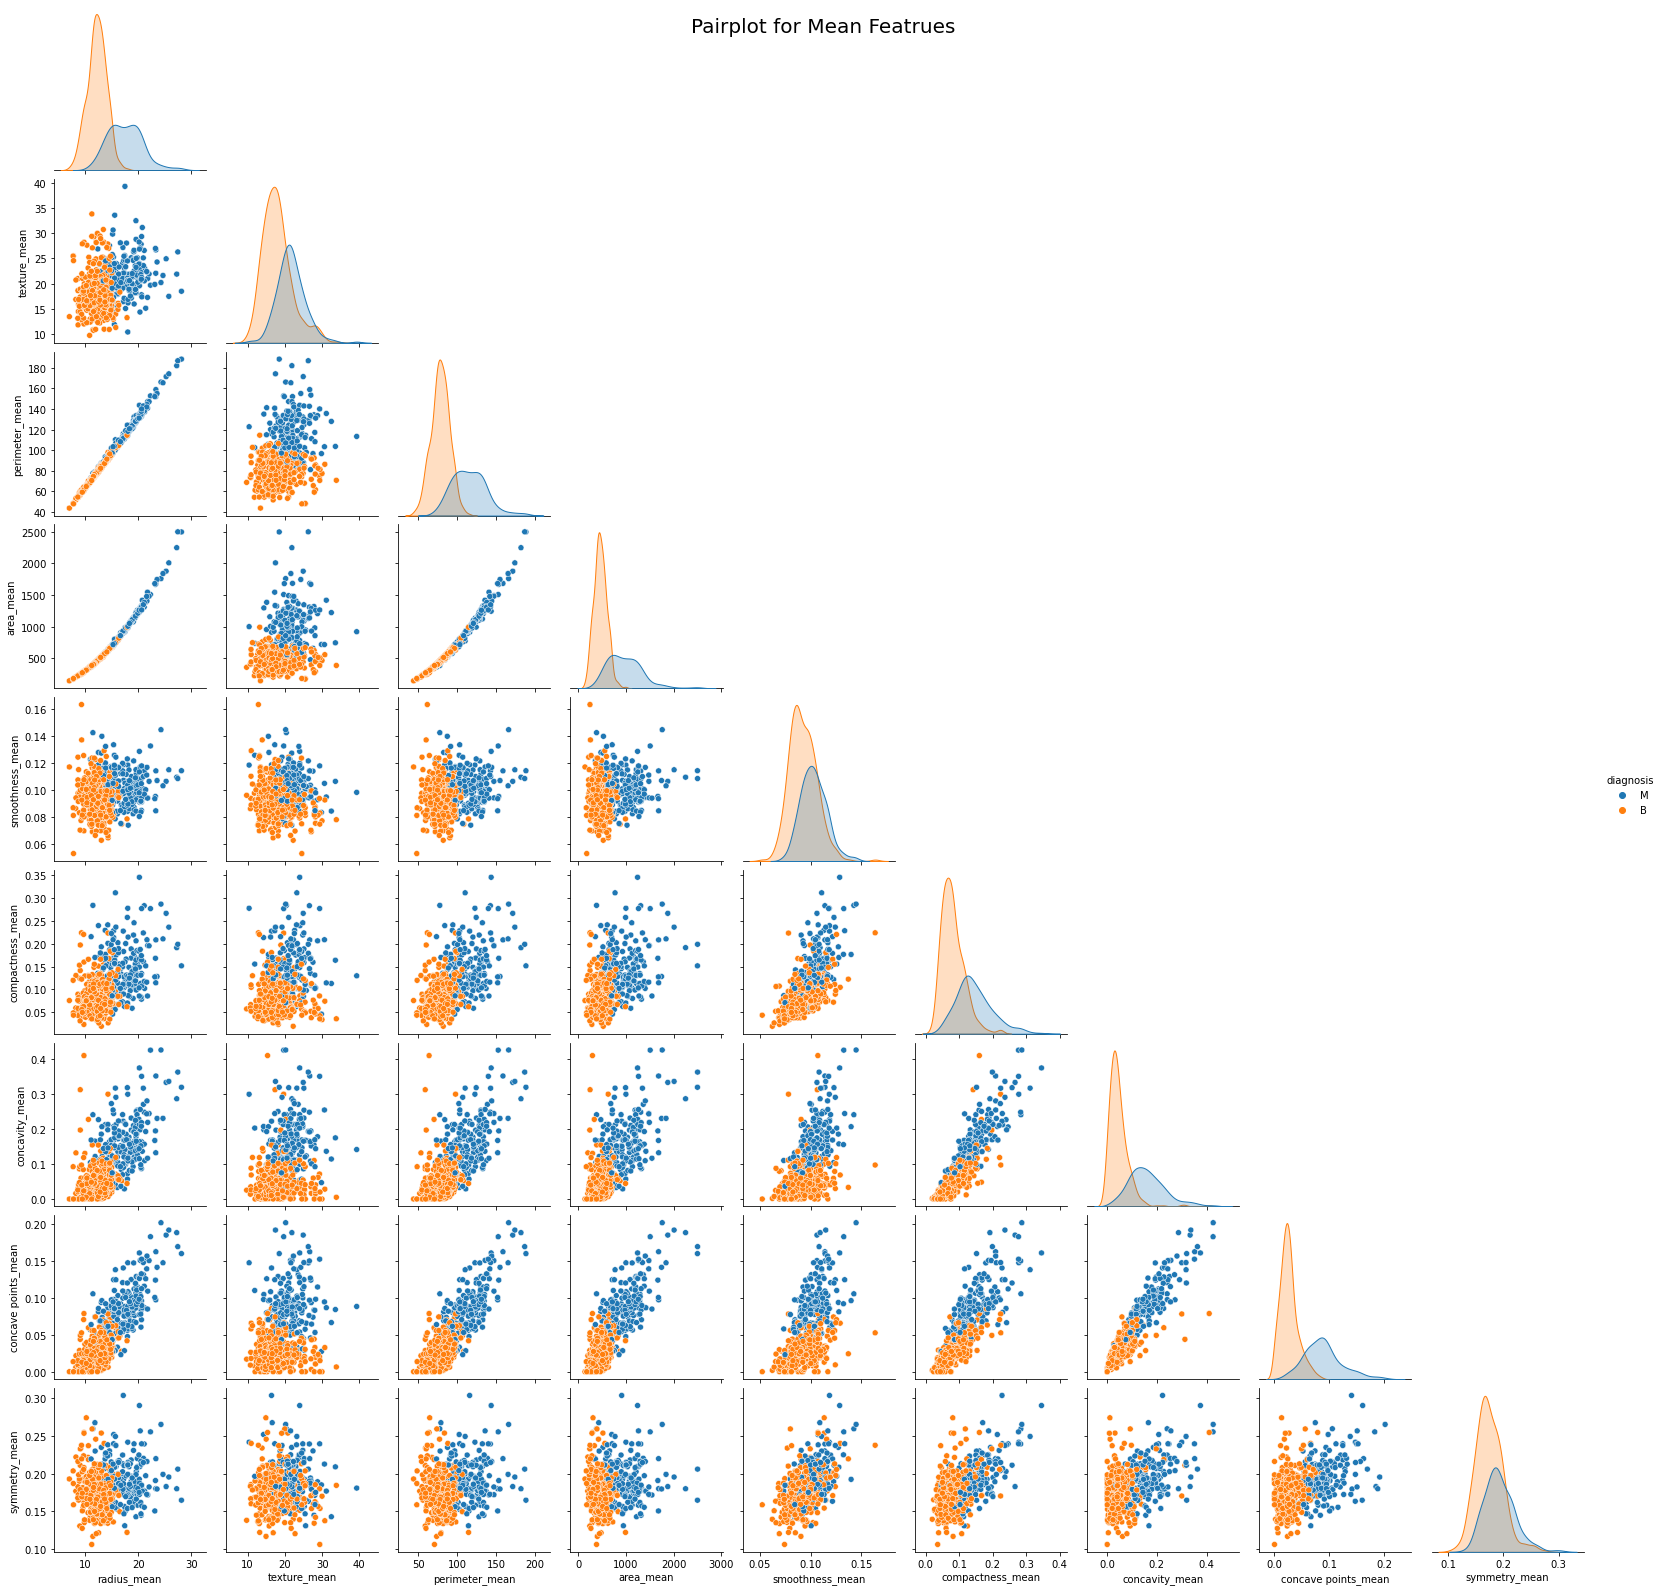

In [7]:

sns.pairplot(data=df_mean, hue='diagnosis', corner=True).fig.suptitle('Pairplot for Mean Featrues', fontsize = 20)
plt.savefig('static/images/sns_scatter.jpg')

In [8]:
# define the output as target
target = breast_cancer_df["diagnosis"]
# target.head()

## Group 1: Select every single input column as feature

In [9]:
# define input, begin with all inputs

features = breast_cancer_df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [10]:
## make synthetic data

# # Fit a kernel density model using GridSearchCV to determine the best parameter for bandwidth
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KernelDensity
# bandwidth_params = {'bandwidth': np.arange(0.01,1,0.05)}
# grid_search = GridSearchCV(KernelDensity(), bandwidth_params)
# grid_search.fit(features)
# kde = grid_search.best_estimator_


In [11]:
# # Generate 100 new sample from this dataset
# synthetic_data = kde.sample(100, random_state=42)

# synthetic_data = pd.DataFrame(synthetic_data, columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
#        'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
#        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
#        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
#        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
#        'fractal_dimension_se', 'radius_worst', 'texture_worst',
#        'perimeter_worst', 'area_worst', 'smoothness_worst',
#        'compactness_worst', 'concavity_worst', 'concave points_worst',
#        'symmetry_worst', 'fractal_dimension_worst'])

In [12]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [13]:
# scale the data
X_scaler = StandardScaler().fit(X_train)

In [14]:
# save the scaler
filename = 'scaler/scaler_allfeatures.sav'
joblib.dump(X_scaler, filename)

['scaler/scaler_allfeatures.sav']

In [15]:
# Transform the training and testing data using the X_scaler model
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# y_train

In [17]:
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

LabelEncoder()

In [18]:
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
encoded_y_train

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [19]:
# Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [20]:
# test with one model - Here, Random Classifier 
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, encoded_y_train)
rf.score(X_test_scaled, encoded_y_test)

filename = 'rf.sav'
joblib.dump(rf, filename)

['rf.sav']

In [21]:
rf.score(X_test_scaled, encoded_y_test)

0.965034965034965

In [22]:
# # check the importance of the features and remove the least important ones ( result was very similar so I did not do it)
# sorted(zip(rf.feature_importances_, features), reverse=True)

## Group 2:  Select features with selectBest function

In [23]:
#SelectKBest (We will have to change the dataframes that feed into X and y):
from sklearn.feature_selection import SelectKBest, chi2
X = features  #independent columns
y = target    #target column i.e price range
#apply SelectKBest class to extract top 7 best features
bestfeatures = SelectKBest()
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 10 best features

                   Specs       Score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021


In [24]:
features_sk = breast_cancer_df[['concave points_worst', 'perimeter_worst', 'concave points_mean',
       'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean'
       ]]

In [25]:
# split the data with features selected according to selectBest function
X_train_sk, X_test_sk, y_train, y_test = train_test_split(features_sk, target, random_state=42)

In [26]:
# scale the data with features selected according to selectBest function
X_scaler_sk = StandardScaler().fit(X_train_sk)

In [27]:
# save the scaler_sk
filename = 'scaler/scaler_selectBestFeatures.sav'
joblib.dump(X_scaler_sk, filename)

['scaler/scaler_selectBestFeatures.sav']

In [28]:
# Transform the training and testing data using the X_scaler model
X_train_scaled_sk = X_scaler_sk.transform(X_train_sk)
X_test_scaled_sk = X_scaler_sk.transform(X_test_sk)

## Group 3: Select features based on their correlation with each other and with the dignosis as determined in the correlation graph in tableau

In [29]:
features_cs = breast_cancer_df[['perimeter_worst',
'concave points_worst',
'symmetry_worst',
'smoothness_worst',
'compactness_worst',
'texture_worst',
'fractal_dimension_worst'
       ]]

In [30]:
# split the data with features selected according to the correlation graph made in tableau
X_train_cs, X_test_cs, y_train, y_test = train_test_split(features_cs, target, random_state=42)

In [31]:
# scale the data with features selected according to selectBest function
X_scaler_cs = StandardScaler().fit(X_train_cs)

In [32]:
# save the scaler_sk
filename = 'scaler/scaler_correlationFeatures.sav'
joblib.dump(X_scaler_cs, filename)

['scaler/scaler_correlationFeatures.sav']

In [33]:
# Transform the training and testing data using the X_scaler model
X_train_scaled_cs = X_scaler_cs.transform(X_train_cs)
X_test_scaled_cs = X_scaler_cs.transform(X_test_cs)

In [34]:
# save train test data set for input with all features, selectBest features and correlation based features as csv file
from numpy import asarray
from numpy import savetxt

savetxt('test_train_data/X_train_scaled.csv', X_train_scaled, delimiter=',')
savetxt('test_train_data/X_test_scaled.csv', X_test_scaled , delimiter=',')
savetxt('test_train_data/y_train_categorical.csv', y_train_categorical , delimiter=',')
savetxt('test_train_data/y_test_categorical.csv', y_test_categorical , delimiter=',')
savetxt('test_train_data/encoded_y_train.csv', encoded_y_train , delimiter=',')
savetxt('test_train_data/encoded_y_test.csv', encoded_y_test , delimiter=',')
savetxt('test_train_data/X_train_scaled_sk.csv', X_train_scaled_sk, delimiter=',')
savetxt('test_train_data/X_test_scaled_sk.csv', X_test_scaled_sk , delimiter=',')
savetxt('test_train_data/X_train_scaled_cs.csv', X_train_scaled_cs, delimiter=',')
savetxt('test_train_data/X_test_scaled_cs.csv', X_test_scaled_cs, delimiter=',')